In [1]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml('mnist_784', version = 1)
dataset.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = dataset['data'], dataset['target']

In [3]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

6


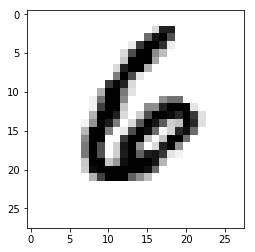

In [5]:
digit = X[13]
digit = digit.reshape(28,28)
plt.imshow(digit, cmap = mpl.cm.binary, interpolation = 'nearest')
print(y[13])

In [6]:
import numpy as np

In [7]:
y = y.astype(np.uint8)

In [8]:
#training set is already 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary Classfier for 6

In [9]:
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

In [10]:
from sklearn.linear_model import SGDClassifier

In [11]:
#Stochastic Gradient Descent (SGD)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_6)

C:\xampp\Py\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
#predicting 6 for the 13 index
sgd_clf.predict([X[13]])

array([ True])

## Measuring Classifier Performance

### Using Cross Validation 

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [14]:
skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

In [15]:
for train_idx, test_idx in skfolds.split(X_train, y_train_6):
    #cloning a model using clone
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_idx]
    y_train_folds = y_train_6[train_idx]
    X_test_fold = X_train[test_idx]
    y_test_fold = y_train_6[test_idx]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    #number of correct
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

C:\xampp\Py\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9797010149492525


C:\xampp\Py\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.975


C:\xampp\Py\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9773988699434972


In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_6, cv=3, scoring="accuracy")

C:\xampp\Py\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\xampp\Py\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\xampp\Py\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max

array([0.97970101, 0.975     , 0.97739887])

<p>It may seem that the accuracy is very high but in reality accuracy may not be a good measure as the data that we have is a skewed data as the percentage of 6's in data is a small fraction and leading to skewness</p>

## Confusion Matrix
<ul>
    <li>Better way to evaluate performance of classifier</li>
    <li>count the number of instances of Class A are identified as class B</li>
</ul>

In [17]:
from sklearn.model_selection import cross_val_predict
#cross validation predict performs K-fold cross validation and give the prediction value.
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_6, cv=3)

C:\xampp\Py\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\xampp\Py\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\xampp\Py\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_6, y_train_pred)

array([[53791,   291],
       [ 1067,  4851]], dtype=int64)

In [19]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_6, y_train_pred)

0.9434072345390898

In [20]:
recall_score(y_train_6, y_train_pred)

0.8197026022304833

In [21]:
#F1 score is harmonice mean of precison and recall score
from sklearn.metrics import f1_score
f1_score(y_train_6, y_train_pred)

0.8772151898734176

<p>
    The F1 score doesn't look that good for the model compared to the crossvalidation  measure that we have used above. Precison and Recall gives a good idea how our model is performing for classifying 6.<br>
    We can introduce threshold in the model which will increase the score that is measured and used by decison function to assign each example to positive or negative instance.
    </p>

## Precision/Recall Tradeoff
<p>
    Let's look at trade between Precision and Recall Tradeoff.
    </p>
<ul>
    <li> Decision Function - computes score for each example.</li>
    <li> introduce threshold for score the score to tune the precison and recall (moving decision boundary of sgd_clf_)</li>
    <li> Raising the threshold increases recall and decreasing will increase precision</li>
    </ul>

In [23]:
cross_val_predict?

In [25]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_6, cv = 4, method = 'decision_function' )

C:\xampp\Py\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\xampp\Py\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\xampp\Py\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max

In [35]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_6, y_scores)


(44252,)

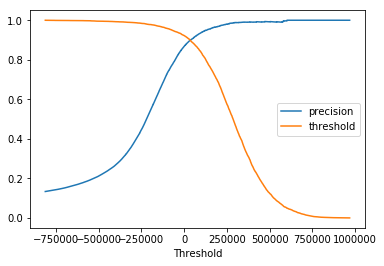

In [44]:
#plot from 0 to -1 as last element is 1 in precision and last element is 0 in recall

plt.plot(thresholds, precisions[:-1], label = 'precision')
plt.plot(thresholds, recalls[:-1], label = 'threshold')
plt.xlabel('Threshold')
plt.legend()


Text(0.5, 1.0, 'Precision Vs Recall')

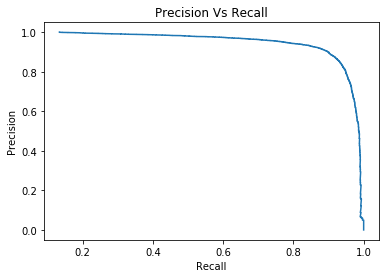

In [49]:
#plotting precison vs recall plot
fig = plt.figure()
plt.plot(precisions,recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Vs Recall')

<p>
    One can see the sharp decline in precision after 0.85 Recall.<br>
    Lets say we want to have 90% precision as a threshold so we will get the threshold score for that precision and use it to get new prediction by doing the following.
    </p>

In [56]:
#using rgmx to find the index which have 0.95 precision or greater
threshold_95_precision = thresholds[np.argmax(precisions >= 0.95)]
threshold_95_precision

130403.0264756027

In [57]:
#applying another layer of filter on predicted values by using the threshold score
y_train_pred_95 = (y_scores >= threshold_95_precision)

#precison score for threshold, it should be 90 
precision_score(y_train_6, y_train_pred_95)

0.9500707499494643

In [58]:
recall_score(y_train_6, y_train_pred_95)

0.7941872254139912

### A high recall classifier is not very useful if recall is very low.

If someone says “let’s reach 99% precision,” you should ask, “at
what recall?”
    - Hands on Machine Learning with Scikit



## ROC Curve
<ul>
    <li> Reciever Operating Charachterstics curve is also used with bindary classifer</li>
    <li> Similar to Precision vs Recall plot, it plots true positive rate (another name for recall) against the false positive rate</li>
    <li> </li>
    <ul>